### '타다 금지법(여객자동차 운수사업법 개정안)'의 
### 국회 법제사법위원회 통과에 따른 유튜브 댓글 반응 분석(텍스트 분석)

In [1]:
import sys

# 데이터 관련
import pandas as pd
import numpy as np

# 자연어 처리 관련

from konlpy.tag import *  
hannanum = Hannanum()
okt = Okt()
kkma = Kkma()
mecab = Mecab()

# 자연어 빈도 워드 크라우드
from collections import Counter 
from wordcloud import WordCloud

# 시각화 관련
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 네트워크 분석 관련
import re
import csv
from apyori import apriori
import networkx as nx

# 몽고DB 관련
import pymongo

# 나이브 베이즈 관련 

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 긍부정 관련
from nltk.classify import NaiveBayesClassifier #Tfidf 안해도되나?


# 자체 생성 함수 - py 파일 변경 시 커널 리스타트 해줘야 한다.
from comment_youtube import *




In [2]:
key = open('key.txt').read()

In [3]:
# mongodb 저장소 새로 생성해서 돌려도 괜찮음!
# 크롬드라이버 위치와 버전 문제인듯. 나중에 깔면 돌아갈듯.
#you_crawal_comment('석유', key)

In [4]:
key = open('key.txt').read()
result = mongo_get_data(str(key))
result.to_csv('result_0417.txt', encoding='utf-8')
result.tail()

,_id,title,date,youtube_id,comment,like_num
2356,5e8b7235899b7f0c9a2e7e1e,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",yk,어떡하냐....,3개
2357,5e8b7235899b7f0c9a2e7e1f,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",윤석,불법콜택시 타다 면허ㆍ자격증 갖고하면 될껄 꽁짜로 꿀꺽 하려니까 문제지 사기꾼 이재웅,6개
2358,5e8b7235899b7f0c9a2e7e20,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",육의철,정의는 죽지않았다,4개
2359,5e8b7235899b7f0c9a2e7e21,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",마을,용역기사 데려다 쓰면서 기사걱정하냐??소가 웃는다.,5개
2360,5e8b7235899b7f0c9a2e7e22,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",민주국가대한민국,회사 사납금에 대해선 찍소리도 못하는 택시 기사들.,3개


In [5]:
# like_num '개' 제거
num_gae = remove_gae(result, 'like_num', '개')


In [6]:
# 댓글 좋아요 내림차순 정렬
comment_result_sort = sort_like(result, num_gae, 'like_co', 1)
comment_result_sort

,_id,title,date,youtube_id,comment,like_num,like_co
1306,5e8b60d2899b7f0dc7ee01b4,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",김유신,결국엔 신천지 때문이지 종교니 뭐니 믿는다니 뭐니 믿는건 좋은데 사람들한테 피해는 ...,285개,285
1309,5e8b60d2899b7f0dc7ee01b7,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",JJY,제대로된 명단을 확보하지 못하면 계속 저럴거임.,280개,280
1310,5e8b60d2899b7f0dc7ee01b8,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",아웃철새,신천지교인은 신천지 합숙소에.격리 시켰으면,259개,259
1313,5e8b60d2899b7f0dc7ee01bb,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",최광덕,신천지 이것들을 인권을따져야할까 아무이유없이 걸리는 사람인권은 마음같으면 협조안하는...,234개,234
1308,5e8b60d2899b7f0dc7ee01b6,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",JamesJim,이 판국인데 신천지 그 개새x들은 1777명이나 방역 협조 요청을 거부하고 있다니\...,219개,219
...,...,...,...,...,...,...,...
104,5e8b60d2899b7f0dc7edfd02,"타다 대표, '타다 금지법' 대통령 거부권 요청","Mar 6, 2020",MinKookDaeHan,It is all about how to cut the limited apple p...,1개,1
103,5e8b60d2899b7f0dc7edfd01,"타다 대표, '타다 금지법' 대통령 거부권 요청","Mar 6, 2020",김정일,재이니형한테가서징징짜거라,1개,1
395,5e8b60d2899b7f0dc7edfe25,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,"Mar 11, 2020",MyrtletreeChae,해외 선진국엔 이미 수년전부터 활성화되어있는데.... 호주엔 우버택시란 이름으로 ....,1개,1
101,5e8b60d2899b7f0dc7edfcff,"타다 대표, '타다 금지법' 대통령 거부권 요청","Mar 6, 2020",정주연,훠훠훠~그럴시간없어!중국댓글알바 알바비주기도 바뻐!훠훠훠~~,1개,1


In [7]:
# 댓글 리스트로 저장 할 필요 없는거 아닌가?
#comment_sort = list(comment_result_sort['comment'])
#comment_sort

#### 데이터 처리

- 2020년 타다금지법 관련 영상을 가져옴
- 금지법 통과 전후 기간 영상 댓글 추출 필요

- 날짜 정렬 + '타다' 제목 영상 가져옴

- KKMA 이용, 사용자 사전에 명사 추가

In [8]:
###### 데이터 핸들링 코드는 함수 변환 하지 않는게 좋을듯? #########

#####  날짜 정렬을 위해 변환


# 변환 항목 확인
comment_result_sort[(comment_result_sort.date =='Premiered Mar 6, 2020')
                   ].head(2)

,_id,title,date,youtube_id,comment,like_num,like_co
264,5e8b60d2899b7f0dc7edfda2,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",QPss,입법문제인데 왜 행정권을 가진 대통령한테\n도움요청하냐? 국회에서 해결할 문제다,21개,21
266,5e8b60d2899b7f0dc7edfda4,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",윤영기,택시가 안전하다는 개소리를 아무렇지도않게 하누 ㅋㅋ,7개,7


In [9]:
# 항목 변환
comment_result_sort.loc[comment_result_sort["date"] == "Premiered Mar 6, 2020", "date"] = "Mar 6, 2020"
# 날짜형 변환하고 확인
comment_result_sort.date = pd.to_datetime(comment_result_sort.date)
comment_result_sort[comment_result_sort.youtube_id == "김문남"
                   ].head(1)

,_id,title,date,youtube_id,comment,like_num,like_co
1492,5e8b7235899b7f0c9a2e7abe,[영상] 법사위 고성 속 '타다 금지법' 통과,2020-03-04,김문남,입법하는사람이합법불법을구분할줄모르니양심은있나봐\n불출마한다고했으니,3개,3


In [10]:
# 타다 금지법 통과 이전 하루에서 통과 후 3월말 가져오기.
comment_result_dr = comment_result_sort[(comment_result_sort.date >= '2020-03-06') & (comment_result_sort.date <= '2020-03-31')]
sorted(comment_result_dr.date.unique())

[numpy.datetime64('2020-03-06T00:00:00.000000000'),
 numpy.datetime64('2020-03-07T00:00:00.000000000'),
 numpy.datetime64('2020-03-08T00:00:00.000000000'),
 numpy.datetime64('2020-03-10T00:00:00.000000000'),
 numpy.datetime64('2020-03-11T00:00:00.000000000'),
 numpy.datetime64('2020-03-16T00:00:00.000000000'),
 numpy.datetime64('2020-03-18T00:00:00.000000000'),
 numpy.datetime64('2020-03-19T00:00:00.000000000'),
 numpy.datetime64('2020-03-21T00:00:00.000000000'),
 numpy.datetime64('2020-03-22T00:00:00.000000000'),
 numpy.datetime64('2020-03-29T00:00:00.000000000'),
 numpy.datetime64('2020-03-31T00:00:00.000000000')]

In [11]:
#  title에 타다만 들어간 단어 검색 후 저장

comment_tada = comment_result_dr[(comment_result_dr.title.str.contains('타다'))]
comment_tada = comment_tada[(comment_tada.title.str.contains('놀이터'))==False] 
# 기간, 좋아요와 제목 정렬한 댓글 목록 -> 
comment_tada_list = list(set(comment_tada.comment))
len(comment_tada_list)

417

In [12]:
# 중복 댓글 제거한 DF
comment_tada_no_dupl = (comment_tada.drop_duplicates(['comment']))
# 저장 encoding 주의~
comment_tada_no_dupl.to_csv('comment_total_no_dupl.csv', encoding='utf-8-sig')

In [13]:
# 리스트형 파일 쓰고 읽기
write_txt(comment_tada_list,'wtest_samlpe.txt',sep="'")
com_txt = open('wtest_samlpe.txt').read()

[complete]


In [14]:
# 라인 별, 중복 단어 제거
duplicate_comment = del_dupl_word('wtest_samlpe.txt')
#duplicate_comment

Fit time :  18.775078296661377


In [15]:
# 두 단어 이상 선택하기
rm_dupl = sel_count_word(duplicate_comment, 2)

In [16]:
# 단어별 빈도수 집계 최종
result_freq_mc = Counter(rm_dupl
                        ).most_common(100)
print(result_freq_mc)

[('택시', 111), ('타다', 107), ('기사', 65), ('불법', 44), ('회사', 30), ('서비스', 27), ('생각', 26), ('이재웅', 24), ('혁신', 23), ('국민', 22), ('사람', 21), ('이재', 21), ('나라', 21), ('사업', 21), ('국회', 20), ('면허', 18), ('일자리', 17), ('영업', 17), ('산업', 16), ('사기꾼', 16), ('지금', 15), ('우리', 15), ('금지법', 14), ('운전', 14), ('대통령', 13), ('문제', 13), ('택시기사', 13), ('손님', 13), ('국가', 13), ('한국', 12), ('이것', 12), ('기사님', 12), ('차량', 12), ('카카오', 12), ('응원', 11), ('업체', 11), ('의원', 11), ('사납금', 11), ('무엇', 10), ('자리', 10), ('이해', 10), ('미래', 10), ('그것', 10), ('기존', 10), ('업계', 10), ('전국', 10), ('니들', 9), ('자격증', 9), ('시장', 9), ('대표', 9), ('교통', 9), ('이상', 9), ('합법', 9), ('직원', 8), ('노마', 8), ('거지', 8), ('법인', 8), ('타다기사', 8), ('이제', 8), ('정부', 8), ('입장', 8), ('금지', 8), ('영업용', 8), ('원님', 8), ('감사', 8), ('대한', 8), ('대한민국', 8), ('민국', 8), ('택시회사', 8), ('렌트카', 8), ('때문', 8), ('기업', 8), ('공유', 7), ('경제', 7), ('1만명', 7), ('우버', 7), ('하면', 7), ('재인', 7), ('여객', 7), ('하나', 7), ('국회의원', 7), ('집단', 7), ('대리', 7), ('시간', 7), ('통과

### 빈도수 그래프

In [17]:
##### 글꼴 관련

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
import nltk 
from nltk.probability import FreqDist 
import matplotlib as mpl

plt.figure(figsize=(12,10))

plt.xlabel("엑스축 라벨") # 변경이 안된다..?
plt.title("댓글 언급 빈도", fontsize=40, verticalalignment='baseline')
graph_comm = FreqDist(rm_dupl) 

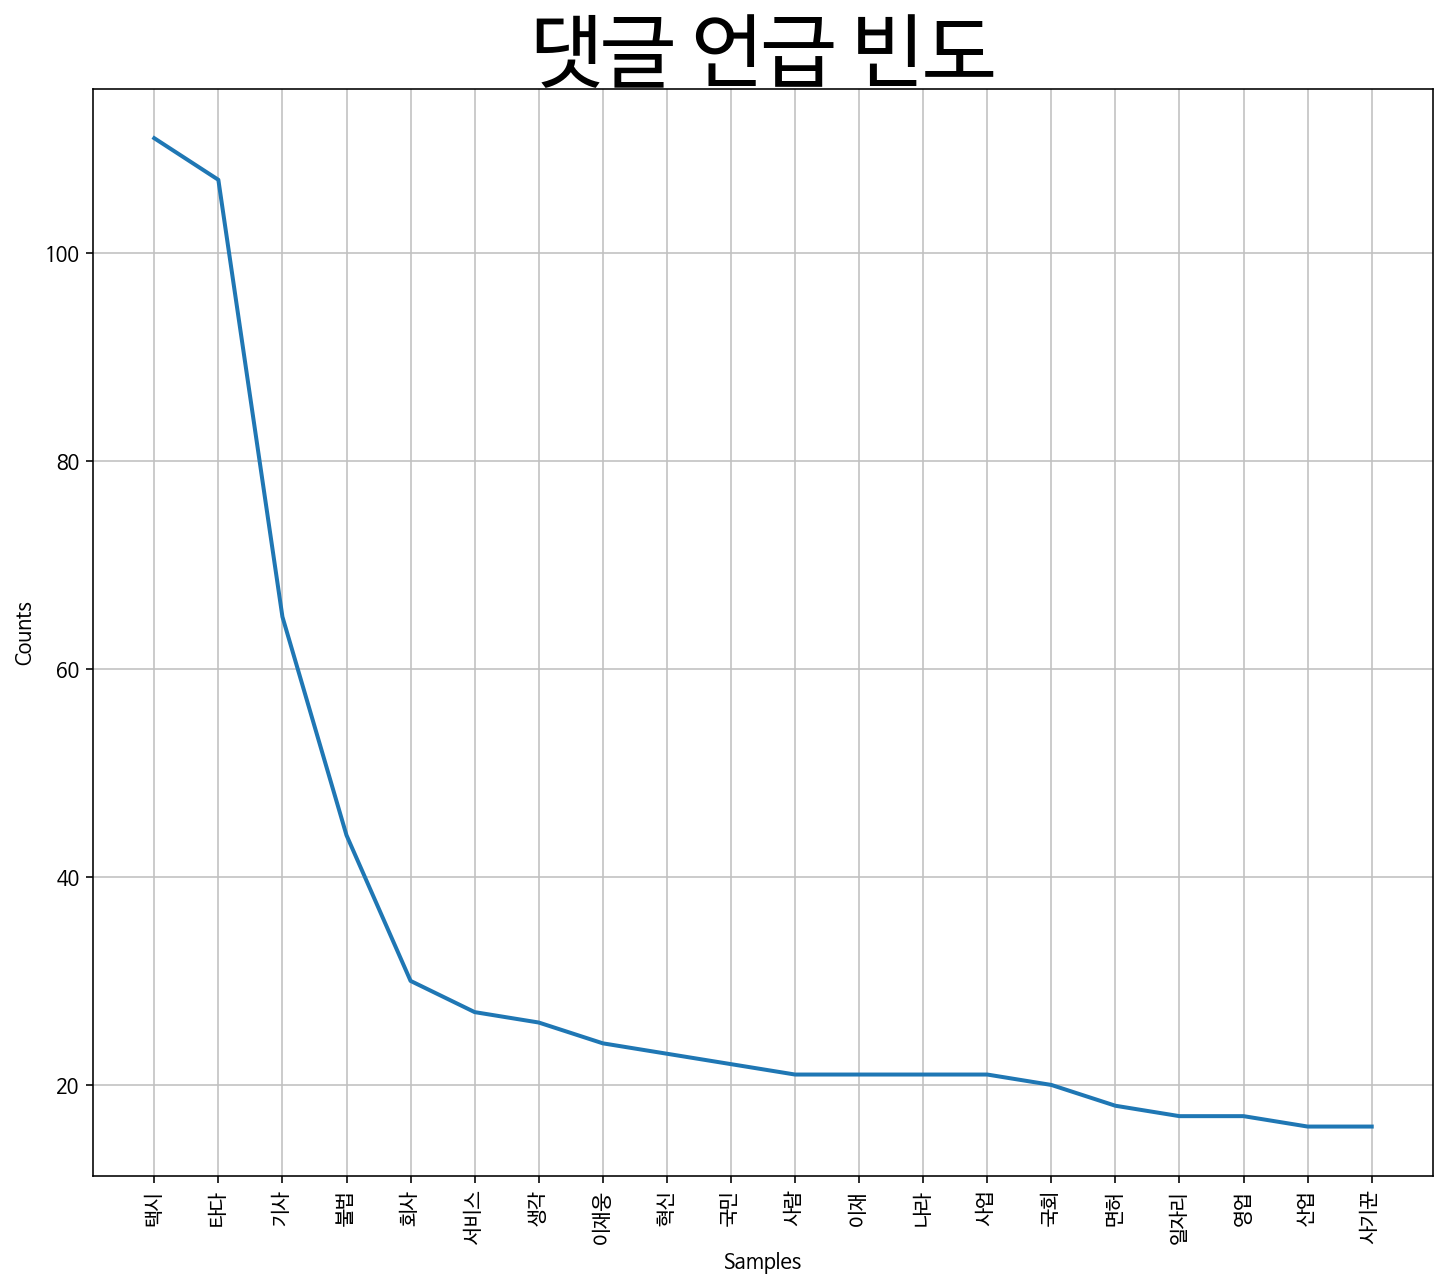

In [18]:
graph_comm.plot(20);

In [19]:
# 단어별 빈도수 집계 최종
result_freq = Counter(rm_dupl)
result_freq_mc = result_freq.most_common(100)
result_freq_mc_dict = dict(result_freq_mc)
print(result_freq_mc)

[('택시', 111), ('타다', 107), ('기사', 65), ('불법', 44), ('회사', 30), ('서비스', 27), ('생각', 26), ('이재웅', 24), ('혁신', 23), ('국민', 22), ('사람', 21), ('이재', 21), ('나라', 21), ('사업', 21), ('국회', 20), ('면허', 18), ('일자리', 17), ('영업', 17), ('산업', 16), ('사기꾼', 16), ('지금', 15), ('우리', 15), ('금지법', 14), ('운전', 14), ('대통령', 13), ('문제', 13), ('택시기사', 13), ('손님', 13), ('국가', 13), ('한국', 12), ('이것', 12), ('기사님', 12), ('차량', 12), ('카카오', 12), ('응원', 11), ('업체', 11), ('의원', 11), ('사납금', 11), ('무엇', 10), ('자리', 10), ('이해', 10), ('미래', 10), ('그것', 10), ('기존', 10), ('업계', 10), ('전국', 10), ('니들', 9), ('자격증', 9), ('시장', 9), ('대표', 9), ('교통', 9), ('이상', 9), ('합법', 9), ('직원', 8), ('노마', 8), ('거지', 8), ('법인', 8), ('타다기사', 8), ('이제', 8), ('정부', 8), ('입장', 8), ('금지', 8), ('영업용', 8), ('원님', 8), ('감사', 8), ('대한', 8), ('대한민국', 8), ('민국', 8), ('택시회사', 8), ('렌트카', 8), ('때문', 8), ('기업', 8), ('공유', 7), ('경제', 7), ('1만명', 7), ('우버', 7), ('하면', 7), ('재인', 7), ('여객', 7), ('하나', 7), ('국회의원', 7), ('집단', 7), ('대리', 7), ('시간', 7), ('통과

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
alice_coloring = np.array(Image.open(path.join(d, './car.jpg')))
stopwords = set(STOPWORDS)
stopwords.add("said")
wc = WordCloud(font_path = fontpath, background_color='white',mask=alice_coloring,width=1500, height=1000)
wc.generate_from_frequencies(result_freq_mc_dict) 
image_colors = ImageColorGenerator(alice_coloring, default_color="hot")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
figure = plt.gcf() 
figure.set_size_inches(9, 8)

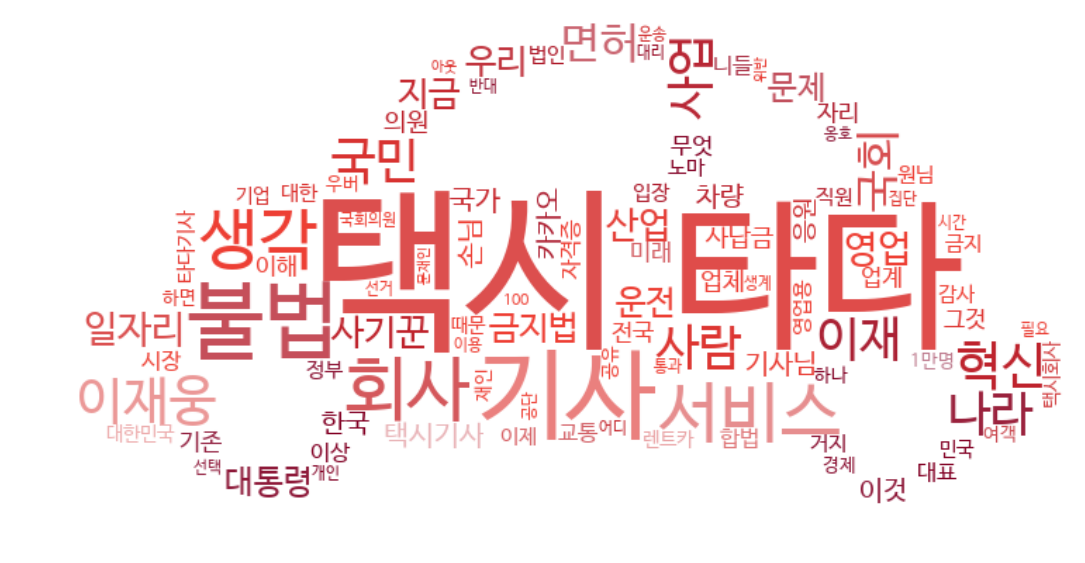

In [20]:
plt.axis('off'); 

### 네트워크 분석

- 불용어 처리
    - https://junior-developer.tistory.com/8
    - http://blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221434157182&categoryNo=75&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
    - 한국어 처리 패키지 중 mecab을 쓰는게 나아보인다. 속도가 빠르다.
    - 타다를 명사로 골라주긴 하나 kkma에 비해 20건 정도 적음. 사용자 사전 추가 필요,
    - https://bitbucket.org/eunjeon/mecab-ko-dic/src/master/ 
    - 사용자 사전 추가 과정이 상당히 번거롭다.

In [21]:
# 한단어만
rm_one = sel_count_word(duplicate_comment, 1)
# 중복 제거
rm_one_stop = list(set(rm_one))
rm_one_stop.remove("차")
"차" in rm_one_stop

False

In [22]:
# stop word를 추가 하고 싶다면 여기에~
add_stop = ['는', 'ㅂ니다', '라', '해', '꽁', '대', '재', '해', '채', '재', '멍']

In [23]:
### stop_word는 함수와 연결되어 있으므로 에러 생길 시 모듈 파일에서 찾아 고쳐야 함
stop_word = rm_one_stop + add_stop
stop_word = list(set(stop_word))
# print(stop_word)

In [24]:
# 불용어 제거
clean_text = []
i = 0
for data in comment_tada_list:
    preprocessed = preprocessing(data)
    clean_text.append(preprocessed)

In [25]:
# 연관성 분석을 위해 단어별 댓글 쪼개기
dataset = []
for i in range(len(clean_text)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_text[i])))
    
test_asso = dataset


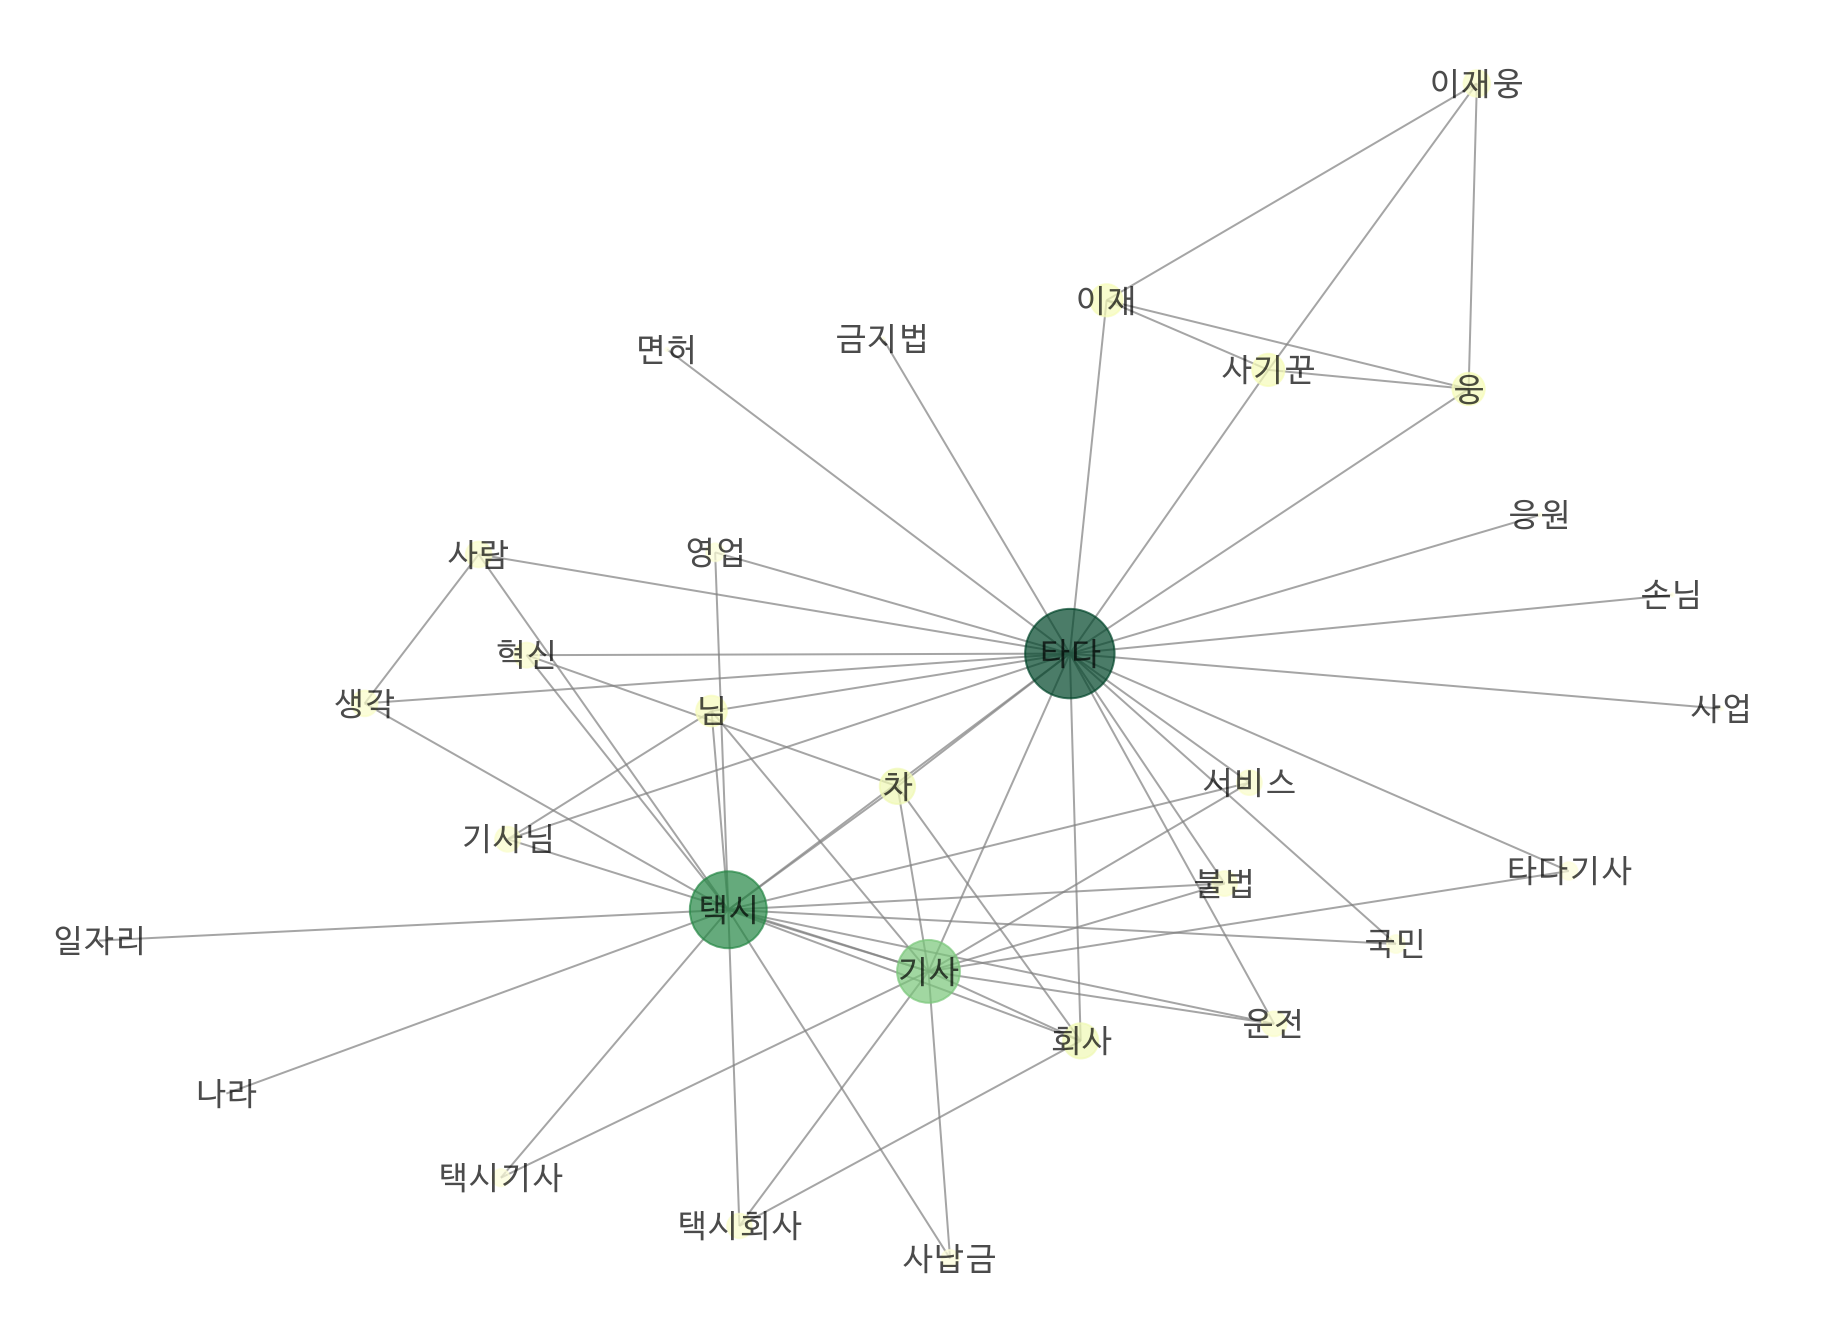

In [26]:
# 지지도 0.017
draw_network(test_asso, 0.017)

### 댓글 분석과 예측

#### 분석 기법

- 나이브 베이즈 - TFid, Multi
- 감성분석 - Kosac and NB(nltk)
- 라벨링 - Kosac 사전 이용

#### 나이브 베이즈 
- TfidfVectorizer : 토큰화
- MultinomialNB : 나이브 베이즈 classify, predict

In [27]:
# 데이터 로드
article_df = pd.read_csv("tada_nb_comm_class.csv")
len(article_df)

1922

In [28]:
# 결측치 존재, class 선별 과정에서 공백 생김
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         1144 non-null   object 
 1   title       1144 non-null   object 
 2   date        1144 non-null   object 
 3   youtube_id  1132 non-null   object 
 4   comment     1144 non-null   object 
 5   like_num    1144 non-null   object 
 6   class       1144 non-null   float64
dtypes: float64(1), object(6)
memory usage: 105.2+ KB


In [29]:
# 결측치 제거
article_df = article_df.dropna(axis=0, how='any')
article_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1921
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         1132 non-null   object 
 1   title       1132 non-null   object 
 2   date        1132 non-null   object 
 3   youtube_id  1132 non-null   object 
 4   comment     1132 non-null   object 
 5   like_num    1132 non-null   object 
 6   class       1132 non-null   float64
dtypes: float64(1), object(6)
memory usage: 70.8+ KB


In [30]:
# 중복제거1
test_data = list(set(article_df.comment))
len(test_data)

871

In [31]:
# 중복제거2, 감성 분석 라벨링 용
# test_data로 사용해도 무방. drop_duplicates도 써보고 싶었음.
test_data_rm_du = article_df.drop_duplicates(['comment'])
len(test_data_rm_du)

871

In [32]:
# train, test 분리. 클래스 비율 고려하지 않음.
value_ =  np.random.rand(len(article_df)) < 0.9
test = article_df[~value_]
train = article_df[value_]
len(test), len(train)
test_data = list(test.comment)

In [33]:
# 데이터 전처리 : 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(
train.comment, train['class'], test_size=0.1, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(914, 102, 914, 102)

In [34]:
# 모델 만들기
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB(alpha=0.1)),
])

In [35]:
# 학습
model = clf.fit(X_train.values.astype("str"), y_train)

In [36]:
# 모델 성능 확인
y_pred = model.predict(X_test)

In [37]:
list(y_test[:5]), list(y_pred[:5])

([2.0, 2.0, 3.0, 2.0, 1.0], [2.0, 2.0, 2.0, 2.0, 1.0])

In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        1.0       0.67      0.50      0.57        24
        2.0       0.73      0.86      0.79        50
        3.0       0.68      0.61      0.64        28

avg / total       0.70      0.71      0.70       102



#### 모델 사용하기

In [39]:
categories = {
    1: "타다",
    2: "택시",
    3: "미분류",

}

In [40]:
# test_data 적용
datas = {
    "content": test_data,
    "category_code": model.predict(test_data),
}
df = pd.DataFrame(datas)
df

,content,category_code
0,결국 모빌리티하려면 택시사업을 하라는거네ㅋㅋㄹ 택시회사를 세우란건가? 사납금으로 운...,1.0
1,0:17 응엌!,2.0
2,이제웅이는 공짜로해먹을 려고 하니 말이 많지 당연이 기여금을 내고 해야 정상이지 ...,2.0
3,뭐지 이 날치기는? 이때까지 이렇게 엉망으로 운영했나?,3.0
4,"챙피함을 아십시요.이러니,늙은 꼰대정치라고하지",1.0
...,...,...
111,모범택시 카카오택시 블랙택시 타세요,2.0
112,역시 엠비씨는 댓글부터 걸러야해 ㅋㅋㅋㅋㅋ,3.0
113,이게무슨 이슈거리인가 불법을 합법처럼 돈에눈이멀어 억어지로 한놈들이 문제지 이슈는 ...,2.0
114,당연한것아니냐\n불법인데,2.0


In [41]:
round(max(model.predict_proba([test_data[1]])[0]), 2)

0.44

In [42]:
df["category"] = df["category_code"].apply(lambda data: categories[data])
df["proba"] = df["content"].apply(
    lambda data: round(max(model.predict_proba([data])[0]), 2) )
df

,content,category_code,category,proba
0,결국 모빌리티하려면 택시사업을 하라는거네ㅋㅋㄹ 택시회사를 세우란건가? 사납금으로 운...,1.0,타다,0.72
1,0:17 응엌!,2.0,택시,0.44
2,이제웅이는 공짜로해먹을 려고 하니 말이 많지 당연이 기여금을 내고 해야 정상이지 ...,2.0,택시,0.96
3,뭐지 이 날치기는? 이때까지 이렇게 엉망으로 운영했나?,3.0,미분류,0.48
4,"챙피함을 아십시요.이러니,늙은 꼰대정치라고하지",1.0,타다,0.72
...,...,...,...,...
111,모범택시 카카오택시 블랙택시 타세요,2.0,택시,0.93
112,역시 엠비씨는 댓글부터 걸러야해 ㅋㅋㅋㅋㅋ,3.0,미분류,0.92
113,이게무슨 이슈거리인가 불법을 합법처럼 돈에눈이멀어 억어지로 한놈들이 문제지 이슈는 ...,2.0,택시,0.98
114,당연한것아니냐\n불법인데,2.0,택시,0.44


In [43]:
# 모델 저장
pickle.dump(model, open("clf.pkl", "wb"))

### 긍부정 분류

In [44]:
result = article_df

In [45]:
# KOSAC사전에서 polarity.csv 파일을 불러온다. ngram.과 max.value 행만 사용하도록 df 내용 수정.
df_dic = pd.read_csv("polarity.csv", encoding='utf-8')
df = df_dic[df_dic['max.value'].notnull()]
df = df[['ngram','max.value']]
# 한글과 영문이 섞여있는 ngram에서, 가장 앞에 있는 한글단어만 추출하는 정규 표현식
p = r'^[가-힣]+'
# KOSAC으로 부터 긍정(POS), 부정(NEG), 중립(NEU)의 사전을 생성한다
pos_dic = []
neg_dic = []
neu_dic = []
for i, row in df.iterrows():
    if row['max.value'] ==  'POS':
        pos_dic.extend(re.findall(p, row['ngram']))
    elif row['max.value'] ==  'NEG':
        neg_dic.extend(re.findall(p, row['ngram']))
    elif row['max.value'] ==  'NEUT':
        neu_dic.extend(re.findall(p, row['ngram']))
# 중복 단어를 제거하기 위해서 set로 만들었다가 list로 변환시킨다
positive_vocab = list(set(pos_dic)) #총 1830개 단어
negative_vocab = list(set(neg_dic)) #총 1623개 단어
neutral_vocab = list(set(neu_dic)) #총 340개 단어
def word_feats(words):
    return dict((word, True) for word in words)
# 사전의 긍정, 부정, 중립단어를 navie bayes에 학습시킬 준비를 한다
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
# 트레인 데이터셋 생성 완료! naive bayes에 학습 시킨다
train_set = negative_features + positive_features + neutral_features
classifier = NaiveBayesClassifier.train(train_set)
# 예측하기 위해 데이터셋 준비(_data.csv 앞에 글자만 작성. tata를 예시로 써둠)
name = "tada"
df = result
data = df[df['comment'].notnull()]
print('총 문장수는 '+ str(len(data)) + '개 입니다')
neg = 0; pos = 0 ;neu = 0;
pos_word = ['POS'] ; neg_word = ['NEG'] ;neu_word = ['NEU'];
# for문으로 예측하고 싶은 문장을 돌려서 한 문장씩 예측 시킨다
for sentence in data['comment']:
    sentence = sentence.lower()
    words = sentence.split(',')
    for word in words:
        classResult = classifier.classify(word_feats(word))
        if classResult == 'neg':
            neg = neg + 1
            neg_word.append(word)
        elif classResult == 'pos':
            pos = pos + 1
            pos_word.append(word)
        elif classResult == 'neu' :
            neu = neu +1
            neu_word.append(word)
# 결과 출력시키기
print('긍정의 문장 수는 ' + str(pos) +'개 입니다')
print('부정의 문장 수는 ' + str(neg) +'개 입니다')
print('중립의 문장 수는 ' + str(neu) +'개 입니다')
print('긍정인 반응은 ' + str(float(pos)*100 / len(data['comment'])) + '% 입니다')
print('부정인 반응은 ' + str(float(neg)*100 /  len(data['comment'])) + '% 입니다')
print('중립인 반응은 ' + str(float(neu)*100 /  len(data['comment'])) + '% 입니다')
# 긍정, 부정, 중립의 문장을 가장 많이 나온 순으로 나열하여 csv 파일로 저장
three_type = [pos_word, neg_word, neu_word]
for one_type in three_type:
    w_count = {}
    for idx,  one_sentence in enumerate(one_type):
        if idx == 0:
            continue
        try: w_count[one_sentence] +=1
        except: w_count[one_sentence] = 1
    pd_data = pd.DataFrame(list(w_count.items()))
    pd_data.columns = ['sentence', 'count']
    pd_data = pd_data.sort_values('count', ascending=False)
    pd_data.to_csv('data_%s_%s.csv'%(name, one_type[0]), mode = 'w', index = False, encoding='utf-8', index_label= False)
print('csv 파일로(3개) 저장 완료')

총 문장수는 1132개 입니다
긍정의 문장 수는 290개 입니다
부정의 문장 수는 223개 입니다
중립의 문장 수는 823개 입니다
긍정인 반응은 25.618374558303888% 입니다
부정인 반응은 19.699646643109542% 입니다
중립인 반응은 72.70318021201413% 입니다
csv 파일로(3개) 저장 완료


=================================================================================

### 감성분석 - kosac 이용

In [46]:
# NB 모델에서 분류한 kosac 긍,부,중 사전 저장
pos = positive_vocab
neg = negative_vocab
neu = neutral_vocab

In [47]:
# 각 사전별 텍스트 저장
# with 를 쓰면 close를 할 필요가 없고 라인별로 읽어줌

with open('pos.txt','w') as f:

    f.writelines(positive_vocab)
with open('neg.txt','w') as f:

    f.writelines(negative_vocab)
with open('neu.txt','w') as f:

    f.writelines(neutral_vocab)   

In [48]:
# 인덱스 to_csv에 index=False로 인덱스 안 불러오게 함.

pd.DataFrame(pos).to_csv('pos.txt',index=False)
pd.DataFrame(neg).to_csv('neg.txt',index=False)
pd.DataFrame(neu).to_csv('neu.txt',index=False)

In [49]:
# 사전 생성
import codecs 
positive = [] 
negative = []
# 원코드에는 Neutral이 없었으나 추가함.
# 뻬나 안뺴나 부정을 분류 못하는거는 똑같아 보임
#neutral = []
posneg = []

pos = codecs.open("tada.txt", 'rb', encoding='UTF-8')

while True: 
    line = pos.readline() 
    line = line.replace('\n', '') 
    positive.append(line) 
    posneg.append(line) 
    
    if not line: break 
pos.close()


neg = codecs.open("taxi.txt", 'rb', encoding='UTF-8')

while True: 
    line = neg.readline() 
    line = line.replace('\n', '') 
    negative.append(line) 
    posneg.append(line) 
    
    if not line: break 
neg.close()

# 중립중립
#neu = codecs.open("neu.txt", 'rb', encoding='UTF-8')

#while True: 
#    line = neu.readline() 
#    line = line.replace('\n', '') 
#    neutral.append(line) 
#    posneg.append(line) 
    
#    if not line: break 
#neu.close()

In [50]:
new_data = pd.read_csv('comment_total_no_dupl.csv')

In [51]:
# 결과 받을 변수 생성
my_title_dic = new_data[["comment"]]

In [52]:
# 감성 분석 테스트 코드

titles = list((test_data_rm_du['comment']))
label = []
for i in range(len(titles)):
    clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', titles[i])
    
    for j in range(len(posneg)):
        posflag = False
        negflag = False
        if j < (len(positive)-1):
            if clean_title.find(posneg[i]) != -1:
                posflag = True
                print(j, "positive?","테스트 : ",clean_title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", j, clean_title)
                break
                
        if j < (len(positive)-2):
            if clean_title.find(posneg[i]) != -1:
                negflag = True
                print(j, "negative?","테스트 : ",clean_title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", j, clean_title)
                break
                
    if posflag == True:
        label.append(1)
    
    elif negflag == True:
        label.append(-1)
        
    elif negflag == False and posflag == False:
        label.append(0)
        


my_title_dic['label'] = label
my_title_dic

0 positive? 테스트 :  68 비교단어 :  응원 인덱스 :  0 반대의견을낸 이철희 채이배 금태섭 입니다🦴
정의당의원들은 기권했습니다🦴

대표연설을 열변하신 👋김경진 박홍근 박덕흠 의원님응원하고 박지원의원님 감사하고 응원 합니다 ✌👏👏👏👏
0 positive? 테스트 :  59 비교단어 :  재 인덱스 :  0 면허자격증 갖고하면 될껄 꽁짜로 쳐묵을려는 사기꾼  총량제 무시  상새안 거절  법규제 개무시하는 타다 이재웅  허가낸 상가 앞에서  장사하려는 노점상에 불과하다
0 positive? 테스트 :  6 비교단어 :  혁신 인덱스 :  0 택시사업이 혁신산업인가ㅡ
돈에 눈먼 재웅아ㅡ거짓의 가면을벗길바란다ㅡ
0 positive? 테스트 :  0 비교단어 :   인덱스 :  0 택시도 정신차리고  잘해야 된다
0 positive? 테스트 :  63 비교단어 :  분열 인덱스 :  0 타다 감성 팔이 그만해야지 처음부터 합법 적으로 했으면 아쉽다 너무 돈에 목숨걸고 불법을 교묘하게 파고들어 국민 분열시키고 인성 부터 고처야 할것이다
0 positive? 테스트 :  0 비교단어 :  불법 인덱스 :  0 불법 콜택시 타다  사기꾼 이재웅  동등한 경쟁해야지  꽁짜로 쳐묵을려니까 문제지 면허자격증 갖고하면 될껄
0 positive? 테스트 :  0 비교단어 :   인덱스 :  0 타다 유권자 보단 택시 유권자가 많으니 표를 얻으려면 어쩔수 없지


IndexError: list index out of range

In [ ]:
my_title_dic.label.value_counts() # 0 중립 1 긍정 -1 부정

In [ ]:
my_title_dic